# PyTorch - CNN

for final exam

## Import Libraries

In [76]:
import torch
import torch.nn as nn # definng neural network
import torch.nn.functional as F # helper
from torch.utils.data import DataLoader # batching
from torchvision import datasets, transforms # loading datasets
from torchvision.utils import make_grid #for visualization
from torchvision.transforms import ToTensor

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [78]:
# installation package
# !pip install torchvision

In [79]:
# check the version
import torchvision
torchvision.__version__

'0.16.0'

In [80]:
# in deep learning, cannot do Cross Validation.
# Instead, we can use seed -- to help serve as alternative cross-validation in deep learning --
torch.manual_seed (47)

## 1. Load the Dataset

In [81]:
# define some transforms (convert 0-255 to 0-1)
transform = transforms.ToTensor()

# if you wan to crop the image, rotate the image; they are all done in this transform

# use the pytorch datasets to load MNIST - dataset of digit images
# train, test
train_data = datasets.MNIST(root = 'data', train = True, download= True, transform = transform)

# validation set
train_set, val_set = torch.utils.data.random_split (train_data, [50000,10000])

# test set
test_data = datasets.MNIST (root='data', train = False, download= True, transform = transform)

In [82]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [83]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [84]:
val_set

 ## 2. DataLoaders

In [85]:
# bigger batch size is prefer
# if batch size is too big >> CUDA out of memory
# buy more GPU or reduce the batch size
train_loader = DataLoader (train_set, batch_size = 64, shuffle = True) # this shuffle will depend on our seed
val_loader = DataLoader (val_set, batch_size = 64, shuffle = True)
test_loader = DataLoader (test_data, batch_size = 10000, shuffle = False) # because no training

In [86]:
len(train_loader) # 782 * 64 = 50,048 = 50000 + 48

782

images shape =  torch.Size([64, 1, 28, 28])
label shape = torch.Size([64])


7

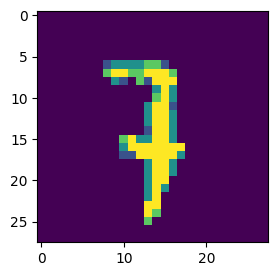

In [87]:
for images, labels in train_loader: # taking 64 images, corresponding 64 labels
    break
print(f"images shape = ", images.shape)# (64 images, 1 channel, height, width)
print (f"label shape =", labels.shape)
# print (images)
the_image = images[0] # get the first image
the_image = np.transpose((the_image), (1,2,0)) # transporse the dimension
the_image.shape
plt.figure(figsize=(3,3))
plt.imshow(the_image)

labels[0].item()
# plt.imshow?? # (h,w,c)

## 3. Define the network

In [88]:
images.shape # input (bs, ch, h, w)

torch.Size([64, 1, 28, 28])

In [89]:
# understanding the relationship between the input an dconvolutional layer
# conv1d  = time series, language, signal
# conv2d = images, spectrograms

# nn.Conv2d (1, 1, 3, 1, 1)
# kernel_size = [3,3] >> 3, [5,5] >> 5
layer1 = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3, stride = 1, padding = 1)

In [90]:
# how to pass something into this layer
output = layer1(images)
output.shape # (bs, out-channel, h, w)

torch.Size([64, 1, 28, 28])

In [91]:
# check the output for each layer
layer1 = nn.Conv2d (1, 5, 3, 1, 1)
layer2 = nn.Conv2d (5, 10, 3, 1, 1)

layer3 = nn.Linear (10 * 28 * 28, 64)

out = layer2(layer1(images))
out = out.reshape ((-1, 10 *28*28))
out2 = layer3(out)
out2.shape

torch.Size([64, 64])

In [95]:
# class Chaky_CNN (nn.Module):
    
#     def __init__(self):  # init all hyperparameters and layers
#         super().__init__() # inherit everything from nn.Module
#         self.layer1 = nn.Conv2d (1, 5, 3, 1, 1)
#         self.layer2 = nn.Conv2d (5, 10, 3, 1, 1) # note: here input layer is 5 as layer 1 output layer is 5
#         self.layer3 = nn.Linear (10 * 28 * 28 , 120)
#         self.layer4 = nn.Linear (120, 84) # why 120, 84 - chaky example
#         self.layer5 = nn.Linear (84, 10) # why 10x10 classes - example
    
#     def forward(self, images): # performing the forward pass through all layers
#         # images: 64, 1, 28, 28
#         out = F.relu(self.layer1(images))
#         # out: 64, 5, 28, 28
#         out = F.relu(self.layer2(out))
#         # out: 64, 10, 28, 28
#         out.reshape((-1, 10*28*28))
#         # out: 64, 7840
#         out = F.relu(self.layer3(out))
#         # out: 64, 120
#         out = F.relu(self.layer4(out))
#         # out: 64, 84
#         out = F.relu(self.layer5(out))
#         # out: 64, 10
#         return out
        

In [99]:
# What is relu?
numbers = torch.tensor ([1, 3, -9, 2])
numbers
F.relu(numbers)

tensor([1, 3, 0, 2])

In [100]:
class Chaky_CNN(nn.Module):
    
    def __init__(self): #init all hyperparameters and layers
        super().__init__() #inherit everything from nn.Module
        self.layer1 = nn.Conv2d(1, 5, 3, 1, 1) 
        self.layer2 = nn.Conv2d(5, 10, 3, 1, 1)
        self.layer3 = nn.Linear(10 * 28 * 28, 120)
        self.layer4 = nn.Linear(120, 84) #why 120, 84 - chaky examples
        self.layer5 = nn.Linear(84, 10)  #why 10, 10 classes
        
    def forward(self, images):  #performing the forward pass through all layers
        out = F.relu(self.layer1(images))
        out = F.relu(self.layer2(out))
        out = out.reshape((-1, 10*28*28))
        out = F.relu(self.layer3(out))
        out = F.relu(self.layer4(out))
        out = F.relu(self.layer5(out))
        return out        

In [101]:
# test first

chaky_model = Chaky_CNN()
output      = chaky_model(images)
print (output.shape)

torch.Size([64, 10])


In [102]:
#skip counting the parameters

## 4. Define the loss and optimizer

In [106]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(chaky_model.parameters(), lr = 0.01)

## 5. Train

In [109]:
num_epochs = 1
# 1. loop epochs
for i in range(num_epochs):
    
    # 2. loop train loader
    for images, labels in train_loader:
        
        # 3. predict / forward pass
        y_hat = chaky_model(images)
        
        # 4. loss
        loss = criterion (y_hat, labels)
        
        # 5. calculate gradients
        optimizer.zero_grad()
        loss.backward()
        
        # 6. update weight
        optimizer.step()
        # print(loss)
        

In [111]:
loss.item()

0.8997066020965576

## 6. Testing

In [112]:
chaky_model.eval() # this will turn off dropout, batch norm
with torch.no_grad(): # this will turn off gradient calculations
    for images, labels in test_loader:
        
        # 1. predict
        y_hat = chaky_model (images)
        
        # 2. loss
        loss = criterion (y_hat, labels)
        
print("Cross Entropy Loss:", loss.item())

Cross Entropy Loss: 1.225827932357788


## 7. Analysis

In [114]:
y_hat.shape, labels.shape

(torch.Size([10000, 10]), torch.Size([10000]))

In [115]:
y_hat_pred = torch.max (y_hat, 1)[1]
y_hat_pred.shape

torch.Size([10000])

In [117]:
# confusion matrix
confusion_matrix (y_hat_pred, labels)

array([[ 964, 1100,    5,    3,  884,  804,  938,    2,  889,   19],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   7,   10, 1002,    8,   16,    2,   15,   17,   10,    0],
       [   6,   14,   16,  981,    0,   31,    4,    9,   21,    5],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    8,    9,    5,   14,    5,    1,  983,    5,    8],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    3,    0,   13,   68,   50,    0,   17,   49,  977]])

## 8. Inference

In [119]:
test_data[0][0].shape
test_data[0][1]

7

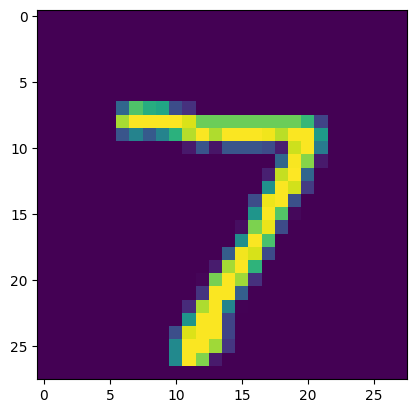

In [121]:
plt.imshow(np.transpose(test_data[0][0],(1,2,0)))


In [122]:
pred = chaky_model(test_data[0][0])

In [123]:
pred

tensor([[ 0.0000,  0.0000,  0.0000,  8.1751,  0.0000,  0.0000,  0.0000, 15.4453,
          0.0000,  4.3424]], grad_fn=<ReluBackward0>)

In [124]:
# among the probability of output number, 7 is the highest probability.